In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# unzip data
with zipfile.ZipFile('/content/drive/MyDrive/dogs-vs-cats-vvsmall.zip', 'r') as zip_ref: 
    zip_ref.extractall("/content/")
    zip_ref.close()


In [4]:
base_dir = '/content/dogs-vs-cats-vvsmall'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

#Directory with cat training images
train_cats_dir = os.path.join(train_dir,'cats')

#Directory with dog training images
train_dogs_dir = os.path.join(train_dir,'dogs')

#Directory with cat validation images
validation_cats_dir = os.path.join(validation_dir,'cats')

#Directory with dog validation images
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [5]:
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))

num_cats_validation = len(os.listdir(validation_cats_dir))
num_dogs_validation = len(os.listdir(validation_dogs_dir))

total_train = num_cats_train + num_dogs_train
total_val = num_cats_validation + num_dogs_validation

In [6]:
print('total training cat images:', num_cats_train)
print('total training dog images:', num_dogs_train)
print('total validation cat images:', num_cats_validation)
print('total validation dog images:', num_dogs_validation)
print("---------------------------------------")
print("Total training images:", total_train)
print("Total validation images:", total_val)


total training cat images: 3000
total training dog images: 3000
total validation cat images: 900
total validation dog images: 900
---------------------------------------
Total training images: 6000
Total validation images: 1800


In [7]:
def plotImages(images_arr):
  fig,axes = plt.subplots(1,5, figsize = (20,20))
  axes = axes.flatten()
  for img,ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [8]:
#Flipping Images horizontally
BATCH_SIZE = 100
IMG_SHAPE = 150

image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))



Found 6000 images belonging to 2 classes.


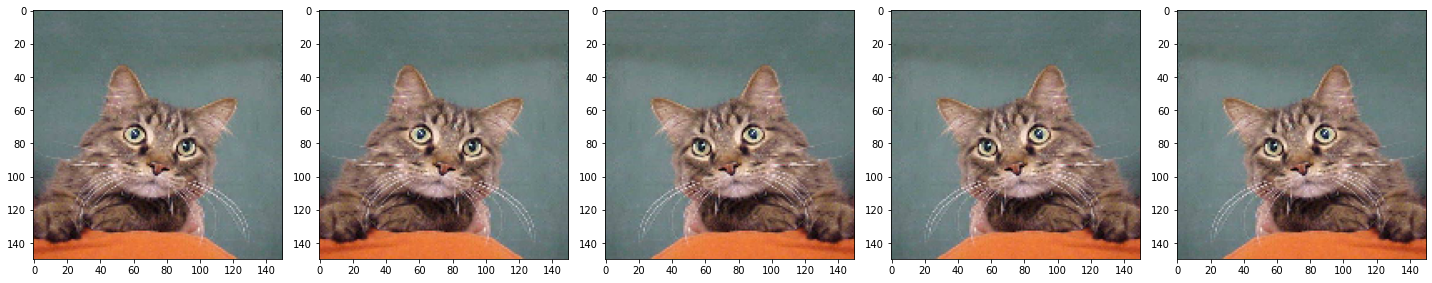

In [9]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 6000 images belonging to 2 classes.


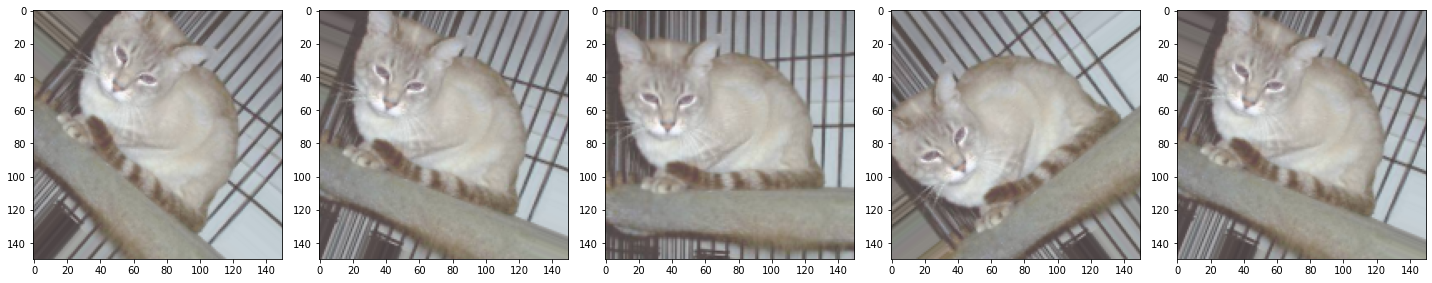

In [10]:
#Rotating Images

image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 6000 images belonging to 2 classes.


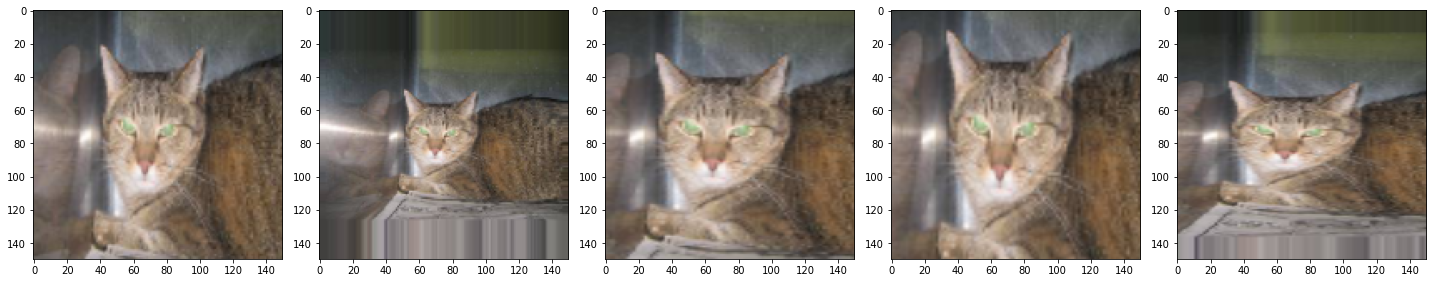

In [11]:
#Applying Zoom

image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)


Found 6000 images belonging to 2 classes.


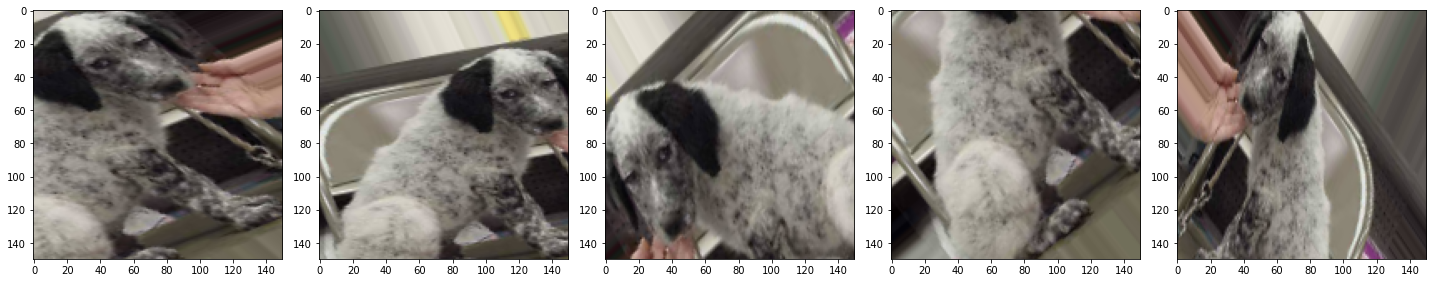

In [12]:
#Creating Training dataset Generator
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.5,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

augmented_train_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_train_images)

Found 1800 images belonging to 2 classes.


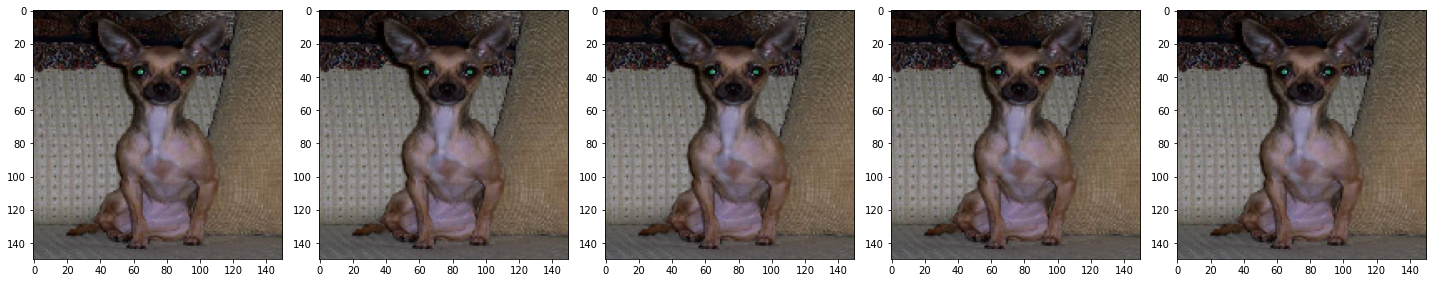

In [13]:
#Creating Validation dataset Generator

image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

augmented_val_images = [val_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_val_images)


In [14]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [15]:
model.compile(optimizer='adam',loss= tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
epochs = 200
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/200
60/60 [==============================] - 54s 815ms/step - loss: 0.6948 - accuracy: 0.5070 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/200
60/60 [==============================] - 48s 799ms/step - loss: 0.6934 - accuracy: 0.4985 - val_loss: 0.6906 - val_accuracy: 0.5594
Epoch 3/200
60/60 [==============================] - 48s 792ms/step - loss: 0.6914 - accuracy: 0.5230 - val_loss: 0.6747 - val_accuracy: 0.5583
Epoch 4/200
60/60 [==============================] - 48s 791ms/step - loss: 0.6896 - accuracy: 0.5333 - val_loss: 0.6836 - val_accuracy: 0.5611
Epoch 5/200
60/60 [==============================] - 48s 792ms/step - loss: 0.6886 - accuracy: 0.5382 - val_loss: 0.6849 - val_accuracy: 0.5661
Epoch 6/200
60/60 [==============================] - 48s 792ms/step - loss: 0.6902 - accuracy: 0.5492 - val_loss: 0.6902 - val_accuracy: 0.5411
Epoch 7/200
60/60 [==============================] - 48s 791ms/step - loss: 0.6888 - accuracy: 0.5410 - val_loss: 0.6800 - val_accuracy:

In [ ]:
# Model Accuracy
train_accuracy = model.evaluate(train_data_gen)
validation_accuracy = model.evaluate(val_data_gen)

18/18 [==============================] - 5s 273ms/step - loss: 0.2109 - accuracy: 0.9178


In [ ]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(train_accuracy[1]*100,train_accuracy[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(validation_accuracy[1]*100,validation_accuracy[0]))

Training Accuracy  : 90.40%     Training loss  : 0.224261
Validation Accuracy: 91.78%     Validation loss: 0.210918


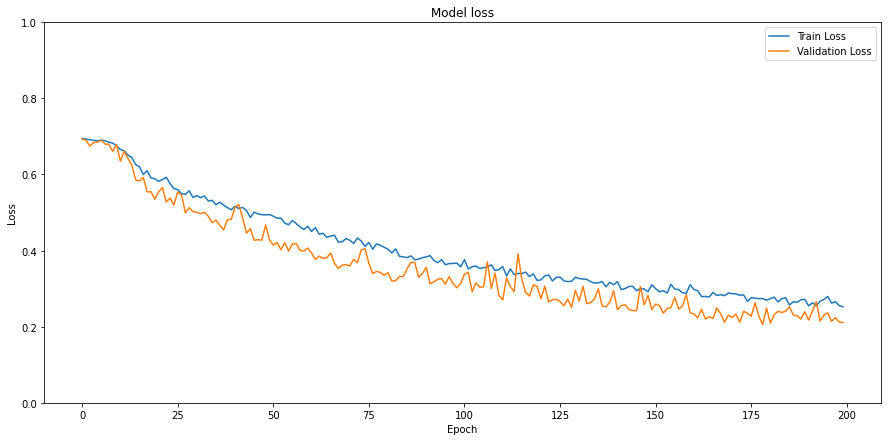

In [ ]:
# summarize history for loss
plt.figure(figsize = (15,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
#plt.xlim(0,50)
plt.ylim(0.0,1.0);

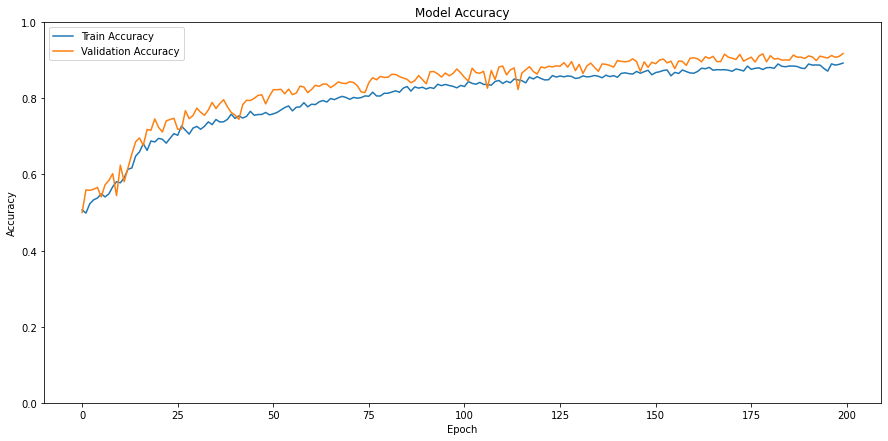

In [ ]:
# summarize history for accuracy
plt.figure(figsize = (15,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='upper left')
#plt.xlim(0,50)
plt.ylim(0.0,1.0)
plt.show()

Hyperameter Tuning

In [17]:
!pip install keras-tuner

     |████████████████████████████████| 98 kB 5.0 MB/s 


In [18]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model(hp):  
  model = keras.Sequential([
    
    keras.layers.Conv2D(filters=hp.Int('conv_1_filter', min_value=16, max_value=128, step=32),
                        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),activation='relu',input_shape=(150,150,3)),

    keras.layers.MaxPooling2D((2,2), padding = 'same'),
    keras.layers.Dropout(rate = hp.Float('dropout_1', min_value = 0.0,max_value = 0.5, default = 0.25,step = 0.05)),


    keras.layers.Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=32),
    kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),activation='relu'),

    keras.layers.MaxPooling2D((2,2),padding = 'same'),
    keras.layers.Dropout(rate = hp.Float('dropout_2', min_value = 0.0, max_value = 0.5,default = 0.25, step = 0.05)),  

    keras.layers.Flatten(),

    keras.layers.Dense(units=hp.Int('dense_1_units', min_value=16, max_value=128, step=32),activation='relu'),

    keras.layers.Dense(2, activation='softmax')
    
    ])

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                    loss="sparse_categorical_crossentropy",metrics=["accuracy"])

  return model
 

In [19]:
import keras_tuner as kt
tuner = kt.BayesianOptimization(build_model, max_trials = 10,objective = 'val_accuracy')

In [20]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [21]:
tuner.search(train_data_gen,validation_data= val_data_gen, epochs=5, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]



Trial 10 Complete [00h 05m 16s]
val_accuracy: 0.6888889074325562

Best val_accuracy So Far: 0.7066666483879089
Total elapsed time: 00h 48m 18s
INFO:tensorflow:Oracle triggered exit


In [22]:
print("Best convolutional filters are :",best_hps.get('conv_1_filter'),best_hps.get('conv_2_filter'))

Best convolutional filters are : 112 96


In [23]:
best_hps.get('conv_1_kernel'),best_hps.get('conv_2_kernel')

(5, 5)

In [24]:
best_hps.get('dropout_1'), best_hps.get('dropout_2')

(0.0, 0.0)

In [25]:
best_hps.get('dense_1_units')

112

In [26]:
best_hps.get('learning_rate')

0.0001

In [30]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_data_gen,validation_data = val_data_gen, epochs=125)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/125
60/60 [==============================] - 63s 1s/step - loss: 0.6956 - accuracy: 0.5320 - val_loss: 0.6791 - val_accuracy: 0.5250
Epoch 2/125
60/60 [==============================] - 62s 1s/step - loss: 0.6663 - accuracy: 0.5927 - val_loss: 0.6487 - val_accuracy: 0.5983
Epoch 3/125
60/60 [==============================] - 61s 1s/step - loss: 0.6521 - accuracy: 0.6020 - val_loss: 0.6205 - val_accuracy: 0.6367
Epoch 4/125
60/60 [==============================] - 61s 1s/step - loss: 0.6371 - accuracy: 0.6278 - val_loss: 0.5888 - val_accuracy: 0.6906
Epoch 5/125
60/60 [==============================] - 62s 1s/step - loss: 0.6210 - accuracy: 0.6473 - val_loss: 0.5717 - val_accuracy: 0.7011
Epoch 6/125
60/60 [==============================] - 62s 1s/step - loss: 0.6116 - accuracy: 0.6613 - val_loss: 0.5565 - val_accuracy: 0.7094
Epoch 7/125
60/60 [==============================] - 62s 1s/step - loss: 0.6099 - accuracy: 0.6585 - val_loss: 0.5773 - val_accuracy: 0.7022
Epoch 8/125
6

In [31]:
# Model Accuracy
train_accuracy = model.evaluate(train_data_gen)
validation_accuracy = model.evaluate(val_data_gen)

18/18 [==============================] - 6s 322ms/step - loss: 0.3884 - accuracy: 0.8272


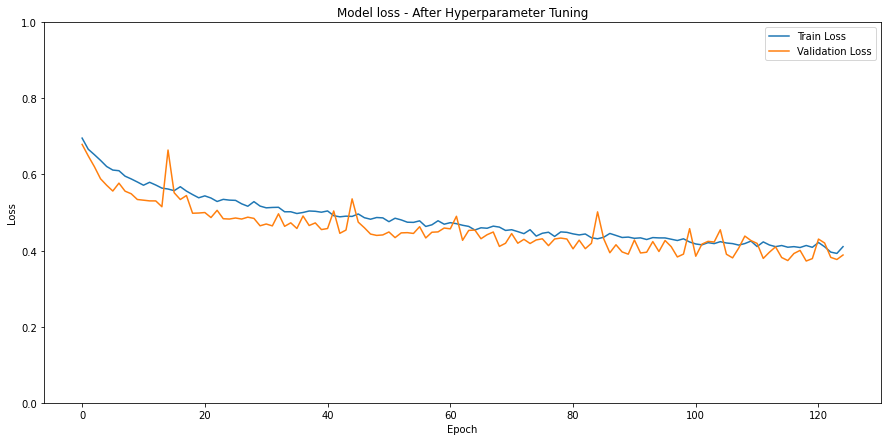

In [33]:
# summarize history for loss
plt.figure(figsize = (15,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss - After Hyperparameter Tuning')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
#plt.xlim(0,50)
plt.ylim(0.0,1.0);

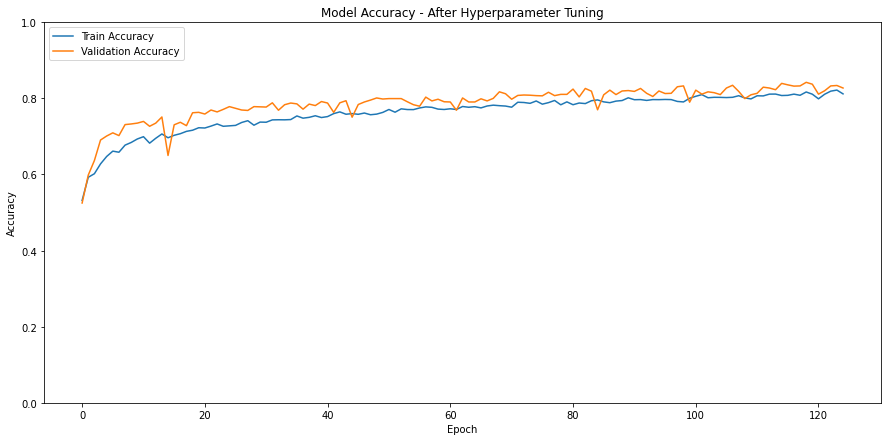

In [34]:
# summarize history for accuracy
plt.figure(figsize = (15,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy - After Hyperparameter Tuning')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='upper left')
#plt.xlim(0,50)
plt.ylim(0.0,1.0)
plt.show()